<a href="https://colab.research.google.com/github/yoooobin/ESAA/blob/main/ESAA_OB_week1_1_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ch.4 모델 훈련



---



#### **4.1** 선형 회귀

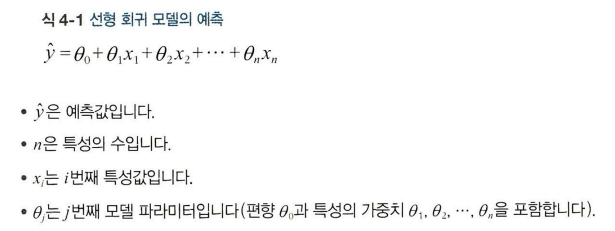

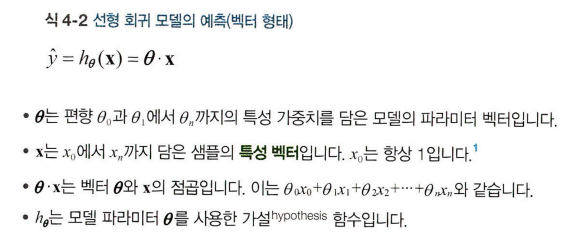

- 선형 회귀 모델을 훈련시키려면 RMSE를 최소화하는 θ를 찾아야 함

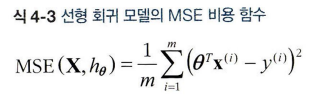

##### **4.1.1 정규방정식**

- **정규방정식(normal equation)**: 비용 함수를 최소화하는 θ값을 찾기 위한 해석적인 방법 / 결과를 얻을 수 있는 수학 공식

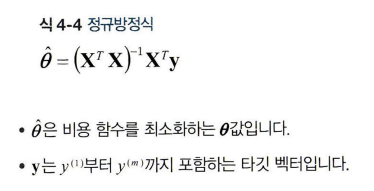

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

- 넘파이 선형대수 모듈(np.linalg)의 inv() 함수로 역행렬을 계산하고 dot() 메서드를 사용해 행렬 곱셈을 함

In [4]:
theta_best

array([[4.14640084],
       [2.89900034]])

-> 기대: θ0 = 4, θ1 = 3

비슷하지만 잡음 때문에 원래 함수의 파라미터를 정확하게 재현 X

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.14640084],
       [9.94440152]])

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

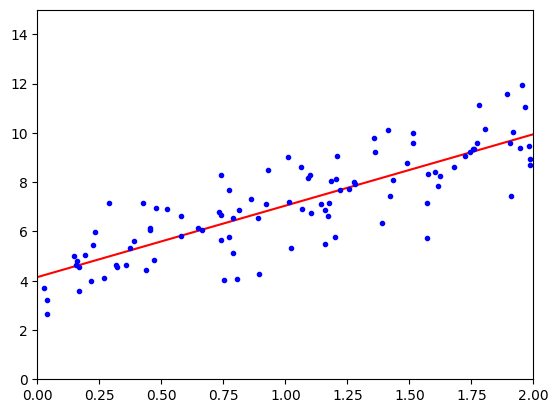

In [7]:
# 모델 예측 그래프
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [12]:
# 사이킷런에서 선형 회귀 수행
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [13]:
print(lin_reg.intercept_, lin_reg.coef_)

[4.14640084] [[2.89900034]]


In [14]:
print(lin_reg.predict(X_new))

[[4.14640084]
 [9.94440152]]


In [15]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.14640084],
       [2.89900034]])

$$\hat{\theta} = X^{+} y$$

- X^{+}는 X의 **유사역행렬(pseudoinverse)**

In [16]:
np.linalg.pinv(X_b).dot(y)

array([[4.14640084],
       [2.89900034]])

**특잇값 분해(singular value decomposition)**(SVD)

- 훈련 세트 행렬 X를 3개의 행렬 곱셈 UΣV^T로 분해 후 X^+ = VΣ^+U^T로 계산

##### **4.1.2 계산 복잡도**

역행렬을 계산하는 **계산 복잡도(computational complexity)**는 일반적으로 O(n^2.4)~O(n^3) 사이



---



#### **4.2** 경사 하강법

**경사 하강법(gradient descent)**(GD): 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 최적화 알고리즘 => 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것

- 파라미터 벡터 θ에 대해 비용 함수의 현재 그레이디언트를 계산
- 그레이디언트가 감소하는 방향으로 진행되어 0이 되면 최솟값에 도달
- θ를 임의의 값으로 시작(*무작위 초기화*)해서 한 번에 조금씩 비용 함수가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상

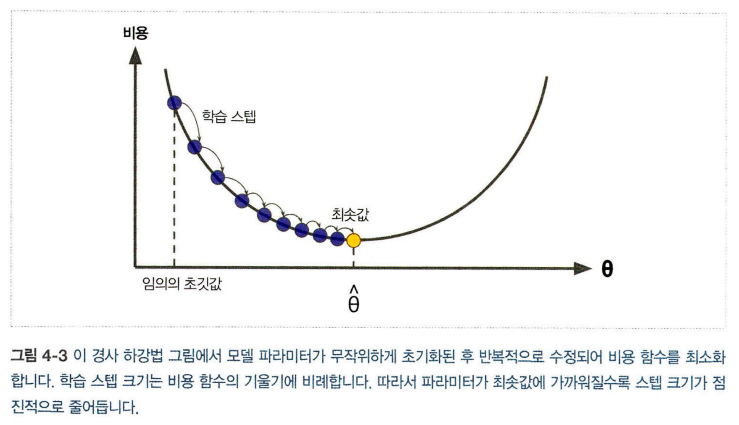

- 스텝의 크기가 가장 중요하며 *학습률(learning rate)* 하이퍼파라미터로 결정

**i. 학습률이 너무 작음**

- 알고리즘이 수렴하기 위해 반복을 많이 진행하여 시간이 오래 걸림

**ii. 학습률이 너무 큼**

- 알고리즘을 더 큰 값으로 발산하게 만들어 적절한 해법 찾지 못함

*경사 하강법의 두 가지 문제점*

- 무작위 초기화 때문에 알고리즘이 전역 최솟값(global minimum)보다 덜 좋은 지역 최솟값(local minimum)에 수렴
- 알고리즘이 평지를 지나기 위해 시간이 오래 걸리고 일찍 멈추어 전역 최솟값에 도달 X

-> 다행히 MSE 비용 함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록 함수(convex function)

- 지역 최솟값이 없고 하나의 전역 최솟값만 존재
- 연속된 함수이고 기울기가 갑자기 변하지 않음
- 모델 훈련: 훈련 세트에서 비용 함수를 최소화하는 모델 파라미터의 조합을 찾는 일 = *파라미터 공간*에서 찾는 것

##### **4.2.1 배치 경사 하강법**

- 경사 하강법 구현: 각 모델 파라미터 θj에 대해 비용 함수의 그레이디언트를 계산
- *편도함수(partial derivative)*: θj가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산

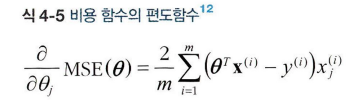

- 각각 계산하지 않고 한꺼번에 계산도 가능

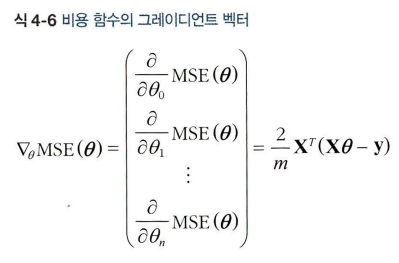

- 위로 향하는 그레이디언트 벡터가 구해지면 반대 방향인 아래로 가야함
- 내려가는 스텝의 크기를 결정하기 위해 그레이디언트 벡터에 학습률을 곱함

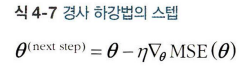

In [17]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [18]:
theta

array([[4.14640084],
       [2.89900034]])

- 학습률을 바꿔본다면?

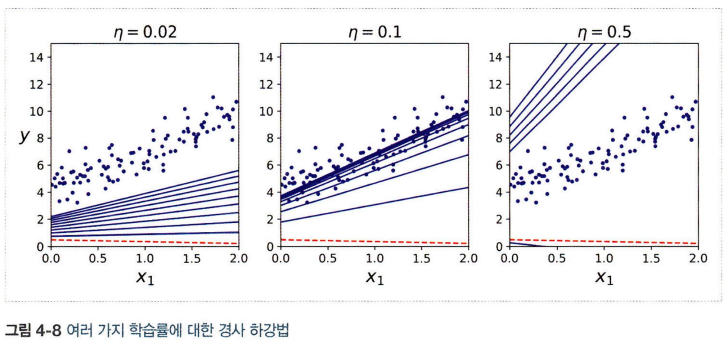

- 0.02: 학습률이 너무 낮아 알고리즘이 최적점에 도달하는데 시간이 오래 걸림
- 0.5: 학습률이 너무 높아 알고리즘이 널뛰면서 스텝마다 최적점에서 멀어지고 발산함

=> 적절한 학습률을 찾기 위해 그리드 탐색 사용

- 반복 횟수를 아주 크게 지정하고 그레이디언트 벡터가 허용오차(tolerance)보다 작아지면 경사 하강법이 거의 최솟값에 도달하여 알고리즘 중지

##### **4.2.2 확률적 경사 하강법**

- 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산
- 무작위성의 딜레마를 해결하기 위해 학습률을 점진적으로 감소시켜 전역 최솟값에 도달하도록 함
- *학습 스케줄(learing schedule)*: 매 반복에서 학습률을 결정하는 함수

In [19]:
n_epochs = 50
t0, t1 = 5, 50   # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i )
        theta = theta - eta * gradients

한 반복에서 *m*번 되풀이, 각 반복을 에포크(epoch)라고 함

In [20]:
theta

array([[4.16128668],
       [2.90935049]])

In [22]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [23]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.08556012]), array([2.92099013]))

##### **4.2.3 미니배치 경사 하강법**

- 하나의 샘플 기반으로 그레이디언트 계산하는 것이 아니라 *미니 배치*라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산하는 것
- 행렬 연산에 최적화된 특히 GPU를 얻는 성능 향상의 장점


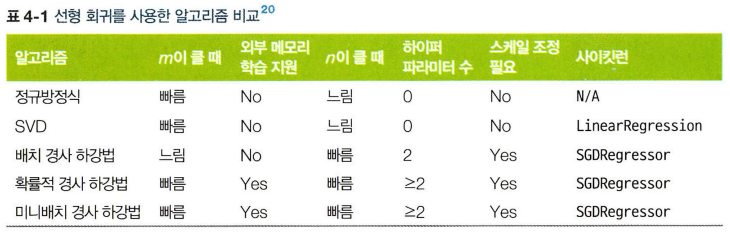



---



#### **4.3** 다항 회귀

- *다항 회귀(polynomial regression)*: 데이터 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 기법

In [24]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [26]:
# 훈련 세트에 있는 각 특성을 제곱하여 새로운 특성으로 추가
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [27]:
X[0]

array([0.66824873])

In [28]:
X_poly[0]

array([0.66824873, 0.44655637])

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.07881758]), array([[0.96416469, 0.44112947]]))

- PolynomialFeatures는 주어진 차수까지 특성 간의 모든 교차항을 추가하기 때문에 특성 사이의 관계를 찾을 수 있음



---



#### **4.4** 학습곡선

- 모델의 일반화 성능을 추정하기 위해 교차 검증을 사용하는 것 이외에도 *학습 곡선*을 살펴볼 수 있음
- **학습 곡선**: 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타냄
- 단순히 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시키면 됨

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련 세트")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")

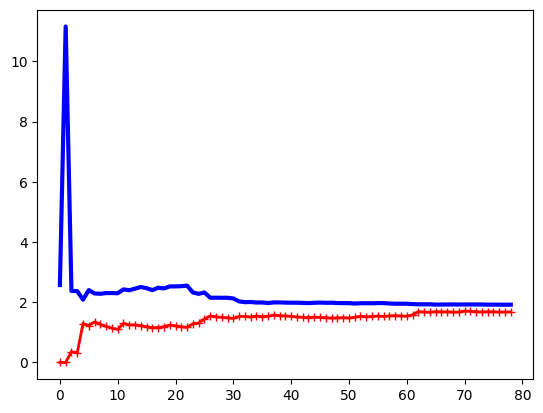

In [31]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)

*훈련 데이터의 성능*:
- 훈련 세트에 하나/두 개의 샘플이 있을 땐 모델이 완벽하게 작동하나 훈련 세트에 샘플이 추가됨에 따라 완벽 학습 불가능

*검증 데이터의 성능*:
- 검증 오차가 초기에 매우 크다가 점차 감소하지만, 선형 회귀 직선이 데이터를 잘 모델링하지 못해 오차 감소가 완만해짐

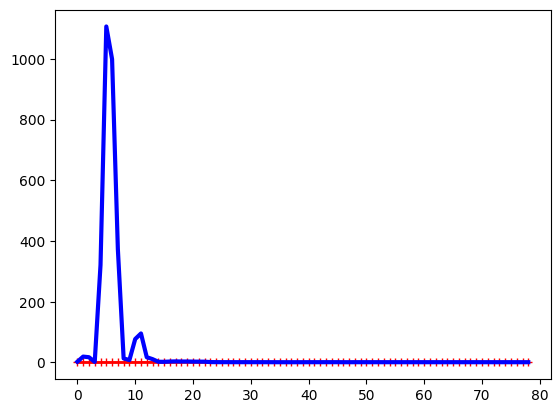

In [32]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curve(polynomial_regression, X, y)

- 훈련 데이터 오차가 선형 회귀 모델보다 훨씬 낮음
- 과대적합 모델

<편향/분산 트레이드오프>

*편향: 일반화 오차 중 잘못된 가정으로 인한 것

*분산: 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감

*줄일 수 없는 오차: 데이터 자체에 있는 잡음